# YOLO_v3 Colab

* YOLO는 객체 검출(Object Detection)의 대표적인 방법 중 하나
* 워싱턴대 대학원생 Joseph Redmon이 개발
<br>
<br>

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. CUDA Version & GPU Check

In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0


In [3]:
!nvidia-smi 

Wed Oct 27 23:29:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.29.05    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P8    32W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# II. cudnn Version Check

> ## 1) cudnn Library Version Check

In [5]:
!ls -l /usr/local

total 72
drwxr-xr-x  1 root root 4096 Oct 26 14:07 bin
lrwxrwxrwx  1 root root   22 Oct 26 13:27 cuda -> /etc/alternatives/cuda
drwxr-xr-x 16 root root 4096 Oct 26 13:18 cuda-10.0
drwxr-xr-x 15 root root 4096 Oct 26 13:21 cuda-10.1
lrwxrwxrwx  1 root root   25 Oct 26 13:27 cuda-11 -> /etc/alternatives/cuda-11
drwxr-xr-x 15 root root 4096 Oct 26 13:23 cuda-11.0
drwxr-xr-x  1 root root 4096 Oct 26 13:25 cuda-11.1
drwxr-xr-x  1 root root 4096 Oct 26 13:35 etc
drwxr-xr-x  2 root root 4096 Nov 19  2020 games
drwxr-xr-x  2 root root 4096 Oct 26 13:46 _gcs_config_ops.so
drwxr-xr-x  1 root root 4096 Oct 26 13:56 include
drwxr-xr-x  1 root root 4096 Oct 26 13:57 lib
-rw-r--r--  1 root root 1636 Oct 26 13:51 LICENSE.txt
drwxr-xr-x  3 root root 4096 Oct 26 13:46 licensing
lrwxrwxrwx  1 root root    9 Nov 19  2020 man -> share/man
drwxr-xr-x  2 root root 4096 Nov 19  2020 sbin
-rw-r--r--  1 root root 7291 Oct 26 13:51 setup.cfg
drwxr-xr-x  1 root root 4096 Oct 26 13:44 share
drwxr-xr-x  2 root roo

# III. Custom Data_Set

> ## Google Drive Mount

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


> ## 1) 'custom_data' & 'darknet' 설치경로 설정

In [6]:
!mkdir /content/yolo_custom_modeling 

In [7]:
%cd /content/yolo_custom_modeling

/content/yolo_custom_modeling


> ## 2) 학습 데이터 Upload

In [9]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/maskDataSet.zip'

-rw------- 1 root root 55052182 Oct 12 08:14 '/content/drive/My Drive/Colab Notebooks/datasets/maskDataSet.zip'


In [10]:
!unzip '/content/drive/My Drive/Colab Notebooks/datasets/maskDataSet.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/maskDataSet.zip
  inflating: backup/yolov3-tiny-custom_final.weights  
  inflating: backup/yolov3-tiny.conv.11  
 extracting: dataset/image/classes.txt  
  inflating: dataset/image/images102.jpg  
 extracting: dataset/image/images102.txt  
  inflating: dataset/image/images103.jpg  
 extracting: dataset/image/images103.txt  
  inflating: dataset/image/images19.jpg  
  inflating: dataset/image/images19.txt  
  inflating: dataset/image/images22.jpg  
  inflating: dataset/image/images22.txt  
  inflating: dataset/image/images23.jpg  
 extracting: dataset/image/images23.txt  
  inflating: dataset/image/images24.jpg  
  inflating: dataset/image/images24.txt  
  inflating: dataset/image/images248.jpg  
  inflating: dataset/image/images248.txt  
  inflating: dataset/image/images25.jpg  
  inflating: dataset/image/images25.txt  
  inflating: dataset/image/images27.jpg  
 extracting: dataset/image/images27.txt  
  inflating: dataset/imag

In [11]:
!ls -l '/content/yolo_custom_modeling'

total 16
drwxr-xr-x 2 root root 4096 Oct 27 23:31 backup
-rw-r--r-- 1 root root 2488 Oct  8 13:15 creating-files-data-and-name.py
-rw-r--r-- 1 root root 3024 Oct  6 09:26 creating-train-and-test-txt-files.py
drwxr-xr-x 3 root root 4096 Oct 27 23:31 dataset


# IV. Train vs. Test Split Setting

In [12]:
!pwd

/content/yolo_custom_modeling


> ## 1) 'labelled_data.data' 파일 생성

In [13]:
!python creating-files-data-and-name.py

In [14]:
!ls -l dataset/labelled_data.data 

-rw-r--r-- 1 root root 113 Oct 27 23:31 dataset/labelled_data.data


> ## 2) train 및 test 데이터 분류 파일 생성

* 50 vs 50

In [15]:
!python creating-train-and-test-txt-files.py

In [16]:
!ls -l dataset/*.txt

-rw-r--r-- 1 root root 2110 Oct 27 23:31 dataset/test.txt
-rw-r--r-- 1 root root 2115 Oct 27 23:31 dataset/train.txt


# V. 'darknet' Setting

> ## 1) 'darknet' Clone

In [18]:
!pwd 

/content/yolo_custom_modeling


In [17]:
!git clone https://github.com/AlexeyAB/darknet.git 

Cloning into 'darknet'...
remote: Enumerating objects: 15320, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 15320 (delta 0), reused 0 (delta 0), pack-reused 15319
Receiving objects: 100% (15320/15320), 13.90 MiB | 17.04 MiB/s, done.
Resolving deltas: 100% (10372/10372), done.


In [19]:
%ls -l

total 20
drwxr-xr-x  2 root root 4096 Oct 27 23:31 backup/
-rw-r--r--  1 root root 2488 Oct  8 13:15 creating-files-data-and-name.py
-rw-r--r--  1 root root 3024 Oct  6 09:26 creating-train-and-test-txt-files.py
drwxr-xr-x 14 root root 4096 Oct 27 23:31 darknet/
drwxr-xr-x  3 root root 4096 Oct 27 23:31 dataset/


> ## 2) 'Makefile' Configuration

In [20]:
%cd darknet/

/content/yolo_custom_modeling/darknet


In [21]:
!ls -l Makefile

-rw-r--r-- 1 root root 5961 Oct 27 23:31 Makefile


In [22]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

> ## 3) 'darknet' Installation

* 100초

In [23]:
%%time

!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

# VI. 'darknet' Learning


In [24]:
!pwd

/content/yolo_custom_modeling/darknet


> ## 1) 실행권한 설정

In [25]:
!ls -l darknet

-rwxr-xr-x 1 root root 6845400 Oct 27 23:34 darknet


In [26]:
!chmod +x darknet

* Configuration Check

In [27]:
!./darknet detector

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
usage: ./darknet detector [train/test/valid/demo/map] [data] [cfg] [weights (optional)]


> ## 2) 실행환경 설정

* 1) backup 폴더 생성

* 2) 아래 파일을 image 디렉토리에 위치
 - yolov3-tiny-custom.cfg

In [28]:
!pwd 

/content/yolo_custom_modeling/darknet


In [29]:
%cd ..

/content/yolo_custom_modeling


In [ ]:
# !mkdir backup

In [30]:
!ls -l

total 20
drwxr-xr-x  2 root root 4096 Oct 27 23:31 backup
-rw-r--r--  1 root root 2488 Oct  8 13:15 creating-files-data-and-name.py
-rw-r--r--  1 root root 3024 Oct  6 09:26 creating-train-and-test-txt-files.py
drwxr-xr-x 16 root root 4096 Oct 27 23:34 darknet
drwxr-xr-x  3 root root 4096 Oct 27 23:31 dataset


In [31]:
!ls -l dataset/labelled_data.data

-rw-r--r-- 1 root root 113 Oct 27 23:31 dataset/labelled_data.data


In [32]:
!ls -l dataset/yolov3-tiny-custom.cfg

-rw-r--r-- 1 root root 1967 Oct  6 09:26 dataset/yolov3-tiny-custom.cfg


> ## 3) 학습 실행

* 150분

In [33]:
%%time

!darknet/darknet detector train dataset/labelled_data.data dataset/yolov3-tiny-custom.cfg -dont_show 

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.

 3903: 0.347856, 0.373318 avg loss, 0.000010 rate, 2.336393 seconds, 249792 images, 0.097392 hours left
Loaded: 0.000071 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.779244), count: 2, class_loss = 0.001531, iou_loss = 0.065596, total_loss = 0.067127 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.783409), count: 7, class_loss = 0.318370, iou_loss = 0.193992, total_loss = 0.512361 
 total_bbox = 838737, rewritten_bbox = 0.449843 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 16 Avg (IOU: 0.784905), count: 2, class_loss = 0.147661, iou_loss = 0.074701, total_loss = 0.222362 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 23 Avg (IOU: 0.708867), count: 11, class_loss = 0.255104, iou_loss = 0.499428, total_loss = 0.754533 
 total_bbox = 838750, rewritten_bbox = 0.449836 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00)

> ## 4) 학습된 모델 확인

* yolov3-tiny-custom_final.weights

In [34]:
%cd darknet/

/content/yolo_custom_modeling/darknet


In [35]:
!ls -l ../backup

total 209580
-rw-r--r-- 1 root root  6303188 Oct 12 17:13 yolov3-tiny.conv.11
-rw-r--r-- 1 root root 34714236 Oct 28 00:08 yolov3-tiny-custom_1000.weights
-rw-r--r-- 1 root root 34714236 Oct 28 00:39 yolov3-tiny-custom_2000.weights
-rw-r--r-- 1 root root 34714236 Oct 28 01:11 yolov3-tiny-custom_3000.weights
-rw-r--r-- 1 root root 34714236 Oct 28 01:44 yolov3-tiny-custom_4000.weights
-rw-r--r-- 1 root root 34714236 Oct 28 01:44 yolov3-tiny-custom_final.weights
-rw-r--r-- 1 root root 34714236 Oct 28 01:44 yolov3-tiny-custom_last.weights


# VII. 학습결과 확인

> ## 1) 'coco.names' Update

* 아래 내용으로 수정 후 진행

 - no_mask
 - mask

In [36]:
!cp -f /content/yolo_custom_modeling/dataset/image/classes.names /content/yolo_custom_modeling/darknet/data/coco.names

> ## 2) Object Detection 실행

In [40]:
!./darknet detect ../dataset/yolov3-tiny-custom.cfg ../backup/yolov3-tiny-custom_final.weights ../dataset/image/images248.jpg 

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     16       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  16 0.150 BF
   1 max                2x 2/ 2    416 x 416 x  16 ->  208 x 208 x  16 0.003 BF
   2 conv     32       3 x 3/ 1    208 x 208 x  16 ->  208 x 208 x  32 0.399 BF
   3 max                2x 2/ 2    208 x 208 x  32 ->  104 x 104 x  32 0.001 BF
   4 conv     64       3 x 3/ 1    104 x 104 x  32 ->  104 x 104 x  64 0.399 BF
   5 max                2x 2/ 2    104 x 104 x  64 ->   52 x  52 x  64 0.001 BF
   6 conv    128       3 x 3/ 1     52 x  52 x  64 ->   52 x  52 x 128 0.399 BF
   7 max                2x 2/ 2     52 x  52 x 128 ->   26 x  26 x 12

> ## 3) Object Detection 결과 확인

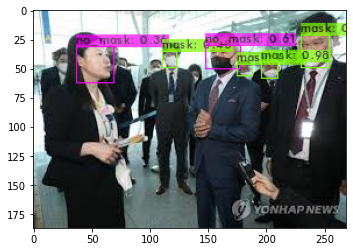

In [41]:
import matplotlib.image as img 
import matplotlib.pyplot as pp 

fileName = 'predictions.jpg' 

ndarray = img.imread(fileName) 

pp.imshow(ndarray) 
pp.show()

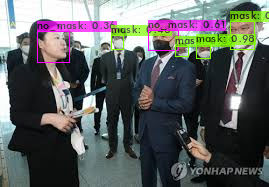

In [42]:
from IPython.display import Image

Image('predictions.jpg')

# 
# 
# 
# The End
# 
# 
# 